In [3]:
from datetime import datetime 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)

In [4]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

krx = fdr.StockListing('KOSPI')
print(len(krx))

Requirement already up-to-date: finance-datareader in c:\ancndaaa\lib\site-packages (0.9.10)
997


In [5]:
#폴더 생성
!mkdir krx

하위 디렉터리 또는 파일 krx이(가) 이미 있습니다.


In [6]:
from concurrent import futures
import csv 

end = datetime(2020, 11, 30)
start = datetime(2010, 1, 1)
bad = []
krx_list=krx['Symbol'].tolist() 
print(len(krx_list))

997


In [7]:
def download(krx_item):

    sym=krx_item
    df=fdr.DataReader(sym, start, end)
    dfnew=df.copy()
    dfnew['Symbol']  =sym
    dfnew.to_csv(f"krx/{sym}.csv", quoting=csv.QUOTE_MINIMAL)    
    
workers=min(50,len(krx)) 

with futures.ThreadPoolExecutor(workers) as executor: 
    res = executor.map(download, krx_list) 

In [8]:
print(len(krx_list))
! find krx -type f | wc -l

997


'wc'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [14]:
remove_list=[]

stocks=pd.DataFrame() 
for krx_item in krx_list: 
  tmp=pd.read_csv(f"krx/{krx_item}.csv",parse_dates=True) 
  if ('Close' in tmp.columns) and ('Date' in tmp.columns):
    tmp.set_index(tmp['Date'],inplace=True,drop=False) 
    tmp_close=tmp['Close'].rename(krx_item) 
    stocks=pd.concat([stocks,tmp_close],axis=1,sort=True) 
else:
    print("delete : ",{krx_item})
    remove_list.append(krx_item) 

for remove_item in remove_list:
  krx_list.remove(remove_item)

stocks = stocks.loc[:,~stocks.columns.duplicated()] 

delete :  {'003280'}


In [9]:
krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시
8,138930,KOSPI,BNK금융지주,기타 금융업,금융지주회사,2011-03-30,12월,김지완,http://www.bnkfg.com,부산광역시
...,...,...,...,...,...,...,...,...,...,...
2595,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2599,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2600,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2601,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [15]:
stocks

,095570,006840,027410,282330,138930,001460,001465,001040,079160,00104K,...,093370,081660,005870,079980,005010,069260,000540,000547,000545,003280
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,10331,NaN,NaN,NaN,125000,55400,58652,19139,NaN,...,3726,NaN,7170,NaN,15900,17885,6850,5090,2200,1142
2010-01-05,NaN,10206,NaN,NaN,NaN,126000,55500,59595,19230,NaN,...,3702,NaN,7430,NaN,16100,17312,6630,5000,2175,1135
2010-01-06,NaN,10206,NaN,NaN,NaN,124500,55300,59595,19593,NaN,...,3755,NaN,7700,NaN,16600,17613,6690,5110,2185,1127
2010-01-07,NaN,10300,NaN,NaN,NaN,127000,55700,60444,19729,NaN,...,3785,NaN,7610,NaN,16650,17312,6500,5000,2130,1219
2010-01-08,NaN,10362,NaN,NaN,NaN,127500,60000,63556,20681,NaN,...,3804,NaN,7560,NaN,16600,17432,6440,5000,2130,1209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,4640.0,22300,4750.0,131500.0,5960.0,277500,136500,81300,22950,61300.0,...,9670,43100.0,6040,8120.0,7290,24800,2800,23200,14850,258
2020-11-25,4600.0,21850,4735.0,131000.0,5990.0,278500,136500,81300,23150,61600.0,...,9390,43650.0,6020,8070.0,7440,24450,2875,23550,14050,258
2020-11-26,4565.0,21650,4495.0,129500.0,5850.0,276500,136500,80400,22650,61100.0,...,9400,43000.0,6010,8070.0,7460,24200,2865,23400,13500,258


## 1. 데이터 준비

In [16]:
stck = stocks.dropna(axis=1)
stck_lag = stck.shift(1)
rtn = (np.log(stck) - np.log(stck.shift(1)))*100

ksp = fdr.DataReader("KS11", start, end)
ksp_lag = ksp.shift(1)
rtn_ksp = (np.log(ksp) - np.log(ksp.shift(1)))*100

<ipython-input-16-1ee06f4e660f>:7: RuntimeWarning: divide by zero encountered in log
  rtn_ksp = (np.log(ksp) - np.log(ksp.shift(1)))*100
<ipython-input-16-1ee06f4e660f>:7: RuntimeWarning: invalid value encountered in log
  rtn_ksp = (np.log(ksp) - np.log(ksp.shift(1)))*100


In [17]:
stck.loc[:,'001465'], stck_lag.loc[:,'001465'], rtn.loc[:,'001465']

(Date
 2010-01-04     55400
 2010-01-05     55500
 2010-01-06     55300
 2010-01-07     55700
 2010-01-08     60000
                ...  
 2020-11-24    136500
 2020-11-25    136500
 2020-11-26    136500
 2020-11-27    142500
 2020-11-30    140500
 Name: 001465, Length: 2693, dtype: int64,
 Date
 2010-01-04         NaN
 2010-01-05     55400.0
 2010-01-06     55500.0
 2010-01-07     55300.0
 2010-01-08     55700.0
                 ...   
 2020-11-24    137000.0
 2020-11-25    136500.0
 2020-11-26    136500.0
 2020-11-27    136500.0
 2020-11-30    142500.0
 Name: 001465, Length: 2693, dtype: float64,
 Date
 2010-01-04         NaN
 2010-01-05    0.180343
 2010-01-06   -0.361011
 2010-01-07    0.720724
 2010-01-08    7.436442
                 ...   
 2020-11-24   -0.365631
 2020-11-25    0.000000
 2020-11-26    0.000000
 2020-11-27    4.301739
 2020-11-30   -1.413451
 Name: 001465, Length: 2693, dtype: float64)

In [18]:
ksp.loc[:,'Close'], ksp_lag.loc[:,'Close'], rtn_ksp.loc[:,'Close']

(Date
 2010-01-04    1696.14
 2010-01-05    1690.62
 2010-01-06    1705.32
 2010-01-07    1683.45
 2010-01-08    1695.26
                ...   
 2020-11-24    2617.76
 2020-11-25    2601.54
 2020-11-26    2625.91
 2020-11-27    2633.45
 2020-11-30    2591.34
 Name: Close, Length: 2694, dtype: float64,
 Date
 2010-01-04        NaN
 2010-01-05    1696.14
 2010-01-06    1690.62
 2010-01-07    1705.32
 2010-01-08    1683.45
                ...   
 2020-11-24    2602.59
 2020-11-25    2617.76
 2020-11-26    2601.54
 2020-11-27    2625.91
 2020-11-30    2633.45
 Name: Close, Length: 2694, dtype: float64,
 Date
 2010-01-04         NaN
 2010-01-05   -0.325976
 2010-01-06    0.865745
 2010-01-07   -1.290752
 2010-01-08    0.699086
                 ...   
 2020-11-24    0.581189
 2020-11-25   -0.621541
 2020-11-26    0.932393
 2020-11-27    0.286727
 2020-11-30   -1.611966
 Name: Close, Length: 2694, dtype: float64)

## 2. 모멘텀 계산

In [19]:
tStartDay=datetime(2011,1,1).strftime("%Y-%m-%d")
tEndDay=tStartDay

In [20]:
momentum_20=stck.pct_change(periods=20)*100 
momentum_60=stck.pct_change(periods=60)*100
momentum_120=stck.pct_change(periods=120)*100 
momentum_180=stck.pct_change(periods=180)*100 
momentum_240=stck.pct_change(periods=240)*100 

ksp_momentum_20=ksp.loc[:,'Close'].pct_change(periods=20)*100
ksp_momentum_60=ksp.loc[:,'Close'].pct_change(periods=60)*100 
ksp_momentum_120=ksp.loc[:,'Close'].pct_change(periods=120)*100 
ksp_momentum_180=ksp.loc[:,'Close'].pct_change(periods=180)*100 
ksp_momentum_240=ksp.loc[:,'Close'].pct_change(periods=240)*100 

In [21]:
momentum_20 , momentum_60, momentum_120, momentum_180, momentum_240

(               006840     001460     001465    001040     079160    000120  \
 Date                                                                         
 2010-01-04        NaN        NaN        NaN       NaN        NaN       NaN   
 2010-01-05        NaN        NaN        NaN       NaN        NaN       NaN   
 2010-01-06        NaN        NaN        NaN       NaN        NaN       NaN   
 2010-01-07        NaN        NaN        NaN       NaN        NaN       NaN   
 2010-01-08        NaN        NaN        NaN       NaN        NaN       NaN   
 ...               ...        ...        ...       ...        ...       ...   
 2020-11-24  25.280899  13.963039  10.975610  3.566879  14.179104  3.115265   
 2020-11-25  23.098592  16.041667  13.750000  3.172589  12.378641  1.552795   
 2020-11-26  23.714286  14.730290  11.428571  3.875969  10.757946  4.402516   
 2020-11-27  28.362573  20.618557  16.326531  5.394737  13.184080  1.880878   
 2020-11-30  20.402299  22.037422  12.851406  3.3986

In [22]:
momentum_20.loc[:,'001465'],momentum_60.loc[:,'001465'],momentum_120.loc[:,'001465'],momentum_180.loc[:,'001465'],momentum_240.loc[:,'001465']

(Date
 2010-01-04          NaN
 2010-01-05          NaN
 2010-01-06          NaN
 2010-01-07          NaN
 2010-01-08          NaN
                 ...    
 2020-11-24    10.975610
 2020-11-25    13.750000
 2020-11-26    11.428571
 2020-11-27    16.326531
 2020-11-30    12.851406
 Name: 001465, Length: 2693, dtype: float64,
 Date
 2010-01-04         NaN
 2010-01-05         NaN
 2010-01-06         NaN
 2010-01-07         NaN
 2010-01-08         NaN
                 ...   
 2020-11-24    5.000000
 2020-11-25    7.480315
 2020-11-26    5.813953
 2020-11-27    8.365019
 2020-11-30    4.850746
 Name: 001465, Length: 2693, dtype: float64,
 Date
 2010-01-04          NaN
 2010-01-05          NaN
 2010-01-06          NaN
 2010-01-07          NaN
 2010-01-08          NaN
                 ...    
 2020-11-24    16.666667
 2020-11-25    16.170213
 2020-11-26    15.677966
 2020-11-27    19.747899
 2020-11-30    19.067797
 Name: 001465, Length: 2693, dtype: float64,
 Date
 2010-01-04          NaN
 2

In [23]:
ksp_momentum_20, ksp_momentum_60, ksp_momentum_120, ksp_momentum_180, ksp_momentum_240

(Date
 2010-01-04          NaN
 2010-01-05          NaN
 2010-01-06          NaN
 2010-01-07          NaN
 2010-01-08          NaN
                 ...    
 2020-11-24    12.309725
 2020-11-25    10.927573
 2020-11-26    12.861300
 2020-11-27    16.156849
 2020-11-30    12.659119
 Name: Close, Length: 2694, dtype: float64,
 Date
 2010-01-04          NaN
 2010-01-05          NaN
 2010-01-06          NaN
 2010-01-07          NaN
 2010-01-08          NaN
                 ...    
 2020-11-24    10.485709
 2020-11-25    10.965898
 2020-11-26    11.560455
 2020-11-27    13.209697
 2020-11-30    10.290907
 Name: Close, Length: 2694, dtype: float64,
 Date
 2010-01-04          NaN
 2010-01-05          NaN
 2010-01-06          NaN
 2010-01-07          NaN
 2010-01-08          NaN
                 ...    
 2020-11-24    25.420302
 2020-11-25    21.170936
 2020-11-26    22.068353
 2020-11-27    20.696925
 2020-11-30    18.635346
 Name: Close, Length: 2694, dtype: float64,
 Date
 2010-01-04        

## 3. 포트폴리오 구성

In [24]:
momentum_1d=stck.pct_change(periods=1)*100
momentumList=['momentum_20','momentum_60','momentum_120','momentum_180','momentum_240']

myDf_best=pd.DataFrame(0,columns=momentumList,index=stck.index)
myDf_median=pd.DataFrame(0,columns=momentumList,index=stck.index)
myDf_worst=pd.DataFrame(0,columns=momentumList,index=stck.index)

#### best 포트폴리오의 5가지 모멘텀 기준별 일별 수익률 myDf_best구하기

In [46]:
def bestmmtrtn(momentumDF,columname,idx):

  top10=momentumDF.loc[idx].sort_values(ascending=False).index[0:10]

  mean=0
  for tStock in top10:

    mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
  mean=mean/10 

  myDf_best.loc[idx,columname]=mean


In [55]:
i=0
calculationPeriod=2000
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:
    

      bestmmtrtn(momentum_20,momentumList[0],idx)
      bestmmtrtn(momentum_60,momentumList[1],idx)
      bestmmtrtn(momentum_120,momentumList[2],idx)
      bestmmtrtn(momentum_180,momentumList[3],idx)
      bestmmtrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [56]:
myDf_best

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-11-24,0.232972,-0.011531,-2.258805,-2.549976,-1.450811
2020-11-25,-0.795103,-1.168233,0.792887,0.498427,0.064596
2020-11-26,-0.287618,-1.477428,0.830320,-0.760903,-1.165467


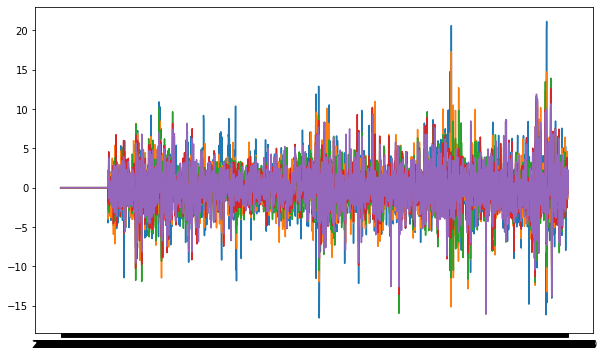

In [57]:
plt.plot(myDf_best)

#### median 포트폴리오의 5가지 모멘텀 기준별 일별 수익률 myDf_median구하기

In [50]:
tStartDay=datetime(2011,1,1).strftime("%Y-%m-%d")
tEndDay=tStartDay

In [58]:
def medianmmtrtn(momentumDF,columname,idx):

  top10=momentumDF.loc[idx].sort_values(ascending=False).index[354:363]

  mean=0
  for tStock in top10:

    mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
  mean=mean/10

  myDf_median.loc[idx,columname]=mean


In [67]:
i=0
calculationPeriod=2300
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:
    

      medianmmtrtn(momentum_20,momentumList[0],idx)
      medianmmtrtn(momentum_60,momentumList[1],idx)
      medianmmtrtn(momentum_120,momentumList[2],idx)
      medianmmtrtn(momentum_180,momentumList[3],idx)
      medianmmtrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [68]:
myDf_median

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-11-24,-1.849619,-0.753152,0.787170,-0.597816,-0.164626
2020-11-25,0.030350,0.872862,-0.248280,0.458702,0.319642
2020-11-26,0.584168,0.361879,1.318310,0.544317,0.600586


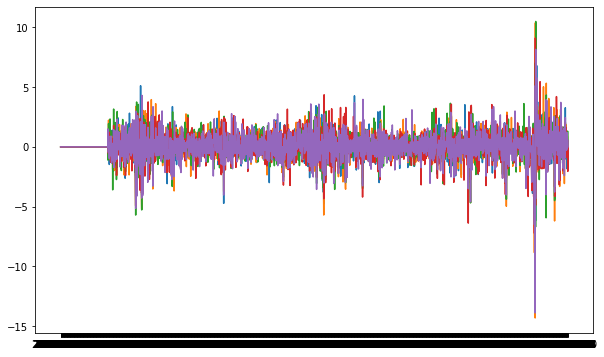

In [69]:
plt.plot(myDf_median)

#### worst 포트폴리오의 5가지 모멘텀 기준별 일별 수익률 myDf_worst구하기

In [74]:
tStartDay=datetime(2011,1,1).strftime("%Y-%m-%d")
tEndDay=tStartDay

In [75]:
def worstmmtrtn(momentumDF,columname,idx):

  top10=momentumDF.loc[idx].sort_values(ascending=False).index[707:716]

  mean=0
  for tStock in top10:

    mean=mean+momentum_1d.loc[idx:].iloc[1].loc[tStock]
  mean=mean/10

  myDf_worst.loc[idx,columname]=mean

In [81]:
i=0
calculationPeriod=2440
for idx, row in stocks.iterrows():
    if idx>=tStartDay and i<calculationPeriod:
    

      worstmmtrtn(momentum_20,momentumList[0],idx)
      worstmmtrtn(momentum_60,momentumList[1],idx)
      worstmmtrtn(momentum_120,momentumList[2],idx)
      worstmmtrtn(momentum_180,momentumList[3],idx)
      worstmmtrtn(momentum_240,momentumList[4],idx)

      i=i+1
      tEndDay=idx
      continue

In [82]:
myDf_worst

,momentum_20,momentum_60,momentum_120,momentum_180,momentum_240
Date,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2020-11-24,-1.317517,-0.594733,-1.832097,-0.914248,-0.187238
2020-11-25,-0.210324,0.125163,-0.491068,0.007765,-0.242740
2020-11-26,0.884470,0.584967,0.016946,0.508436,-0.486958


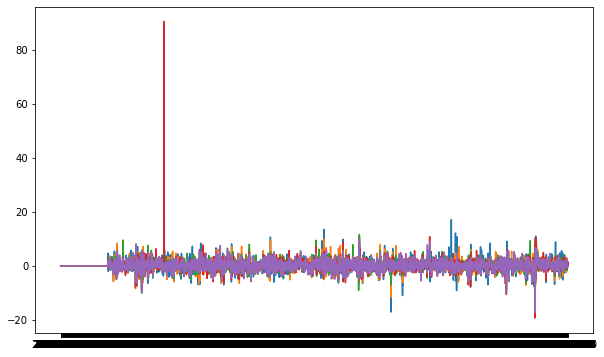

In [83]:
plt.plot(myDf_worst)

### 15개포트폴리오 종합

In [86]:
myDf_best.columns = ['best_momentum_20','best_momentum_60','best_momentum_120','best_momentum_180','best_momentum_240']
myDf_median.columns = ['median_momentum_20','median_momentum_60','median_momentum_120','median_momentum_180','median_momentum_240']
myDf_worst.columns = ['worst_momentum_20','worst_momentum_60','worst_momentum_120','worst_momentum_180','worst_momentum_240']

In [87]:
pd.concat([myDf_best,myDf_median,myDf_worst],axis=1)

,best_momentum_20,best_momentum_60,best_momentum_120,best_momentum_180,best_momentum_240,median_momentum_20,median_momentum_60,median_momentum_120,median_momentum_180,median_momentum_240,worst_momentum_20,worst_momentum_60,worst_momentum_120,worst_momentum_180,worst_momentum_240
Date,,,,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24,0.232972,-0.011531,-2.258805,-2.549976,-1.450811,-1.849619,-0.753152,0.787170,-0.597816,-0.164626,-1.317517,-0.594733,-1.832097,-0.914248,-0.187238
2020-11-25,-0.795103,-1.168233,0.792887,0.498427,0.064596,0.030350,0.872862,-0.248280,0.458702,0.319642,-0.210324,0.125163,-0.491068,0.007765,-0.242740
2020-11-26,-0.287618,-1.477428,0.830320,-0.760903,-1.165467,0.584168,0.361879,1.318310,0.544317,0.600586,0.884470,0.584967,0.016946,0.508436,-0.486958


## 4. 기초통계량과 특성설명

### Best ff

In [89]:
myDf_best.describe()

,best_momentum_20,best_momentum_60,best_momentum_120,best_momentum_180,best_momentum_240
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,0.021250,-0.034020,-0.015394,-0.030963,-0.018806
std,3.160281,2.901192,2.699019,2.535948,2.479717
min,-16.551055,-15.159043,-15.959916,-13.556238,-16.077511
25%,-1.537142,-1.529858,-1.344561,-1.379784,-1.265561
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.590625,1.452645,1.378091,1.304897,1.202876
max,21.114383,17.284959,13.905969,12.610959,11.875827


In [93]:
myDf_best.var()

best_momentum_20     9.987373
best_momentum_60     8.416914
best_momentum_120    7.284702
best_momentum_180    6.431032
best_momentum_240    6.148997
dtype: float64

In [94]:
myDf_best.skew()

best_momentum_20     0.107966
best_momentum_60     0.087942
best_momentum_120   -0.127649
best_momentum_180    0.029548
best_momentum_240   -0.113823
dtype: float64

In [95]:
myDf_best.kurtosis()

best_momentum_20     4.294251
best_momentum_60     3.161962
best_momentum_120    2.889576
best_momentum_180    2.452514
best_momentum_240    3.157635
dtype: float64

In [96]:
myDf_best.mean()/myDf_best.std()

best_momentum_20     0.006724
best_momentum_60    -0.011726
best_momentum_120   -0.005703
best_momentum_180   -0.012210
best_momentum_240   -0.007584
dtype: float64

### Median ff

In [98]:
myDf_median.describe()

,median_momentum_20,median_momentum_60,median_momentum_120,median_momentum_180,median_momentum_240
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,0.037411,0.021169,0.038527,0.020462,0.045827
std,0.960085,1.044081,1.009996,1.017790,1.025153
min,-12.054304,-14.307533,-10.701555,-10.848649,-13.884318
25%,-0.341476,-0.395183,-0.426186,-0.411735,-0.399720
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.498077,0.492480,0.528529,0.495576,0.522556
max,7.031122,10.377359,10.488087,9.102144,8.156512


In [99]:
myDf_median.var()

median_momentum_20     0.921764
median_momentum_60     1.090104
median_momentum_120    1.020093
median_momentum_180    1.035897
median_momentum_240    1.050938
dtype: float64

In [100]:
myDf_median.skew()

median_momentum_20    -0.833702
median_momentum_60    -1.118682
median_momentum_120   -0.418032
median_momentum_180   -0.551206
median_momentum_240   -0.885271
dtype: float64

In [101]:
myDf_median.kurtosis()

median_momentum_20     15.927915
median_momentum_60     22.714836
median_momentum_120    13.503287
median_momentum_180    11.869668
median_momentum_240    18.103648
dtype: float64

In [102]:
myDf_median.mean()/myDf_median.std()

median_momentum_20     0.038966
median_momentum_60     0.020276
median_momentum_120    0.038146
median_momentum_180    0.020104
median_momentum_240    0.044703
dtype: float64

### Worst ff

In [103]:
myDf_worst.describe()

,worst_momentum_20,worst_momentum_60,worst_momentum_120,worst_momentum_180,worst_momentum_240
count,2693.000000,2693.000000,2693.000000,2693.000000,2693.000000
mean,0.095954,0.079032,0.099908,0.095412,0.042069
std,2.231248,1.999858,1.921686,2.533396,1.777585
min,-18.854774,-15.931420,-18.858827,-19.335887,-17.280861
25%,-0.957221,-0.860628,-0.913292,-0.882779,-0.890670
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.117155,1.040323,1.028430,1.052484,0.973842
max,17.116774,10.844718,11.585180,90.458188,9.801550


In [104]:
myDf_worst.var()

worst_momentum_20     4.978468
worst_momentum_60     3.999431
worst_momentum_120    3.692878
worst_momentum_180    6.418094
worst_momentum_240    3.159808
dtype: float64

In [105]:
myDf_worst.skew()

worst_momentum_20      0.029152
worst_momentum_60     -0.147468
worst_momentum_120    -0.144597
worst_momentum_180    16.734615
worst_momentum_240    -0.254219
dtype: float64

In [106]:
myDf_worst.kurtosis()

worst_momentum_20       7.402471
worst_momentum_60       4.538569
worst_momentum_120      6.316681
worst_momentum_180    602.501551
worst_momentum_240      5.665737
dtype: float64

In [107]:
myDf_worst.mean()/myDf_worst.std()

worst_momentum_20     0.043005
worst_momentum_60     0.039519
worst_momentum_120    0.051990
worst_momentum_180    0.037662
worst_momentum_240    0.023667
dtype: float64

#### best fortfolio 의 표준편차가 가장 큰 것으로 보아, 위험이 큰 포트폴리오라고 추측할 수 있다.
#### median fortfolio 의 첨도가 대체로 큰 것으로 보아, 대체로 큰 손실이나 큰 수익이  날 확률이 높다고 볼 수 있다.
#### median fortfolio 의 왜도가 대체로 음수인 것을 보아, 수익률 분포가 오른쪽으로 치우쳐, 아주 큰 손실이 날 가능성이 제법 존재함을 알 수 있다.

## 5. heatmap, pairplot, 특성설명

In [118]:
import seaborn as sb

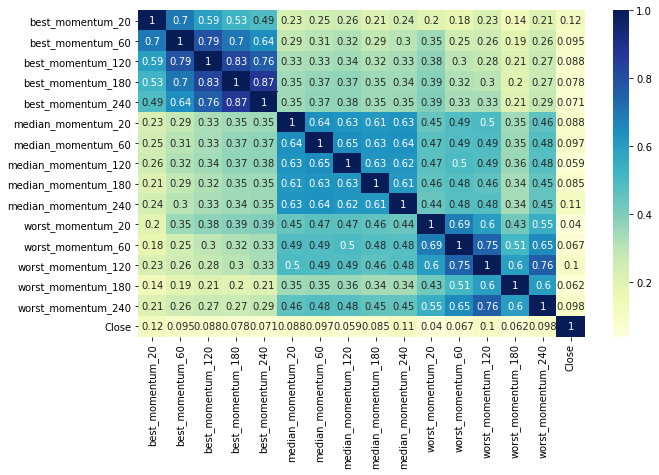

In [122]:
eqt1 = pd.merge(myDf_best, myDf_median, left_index=True, right_index=True, how='inner')
eqt2 = pd.merge(myDf_worst, rtn_ksp.loc[:,'Close'], left_index=True, right_index=True, how='inner')
eqt3 = pd.merge(eqt1, eqt2, left_index=True, right_index=True, how='inner')
sb.heatmap(eqt3.corr(), annot=True, cmap="YlGnBu")
plt.show()

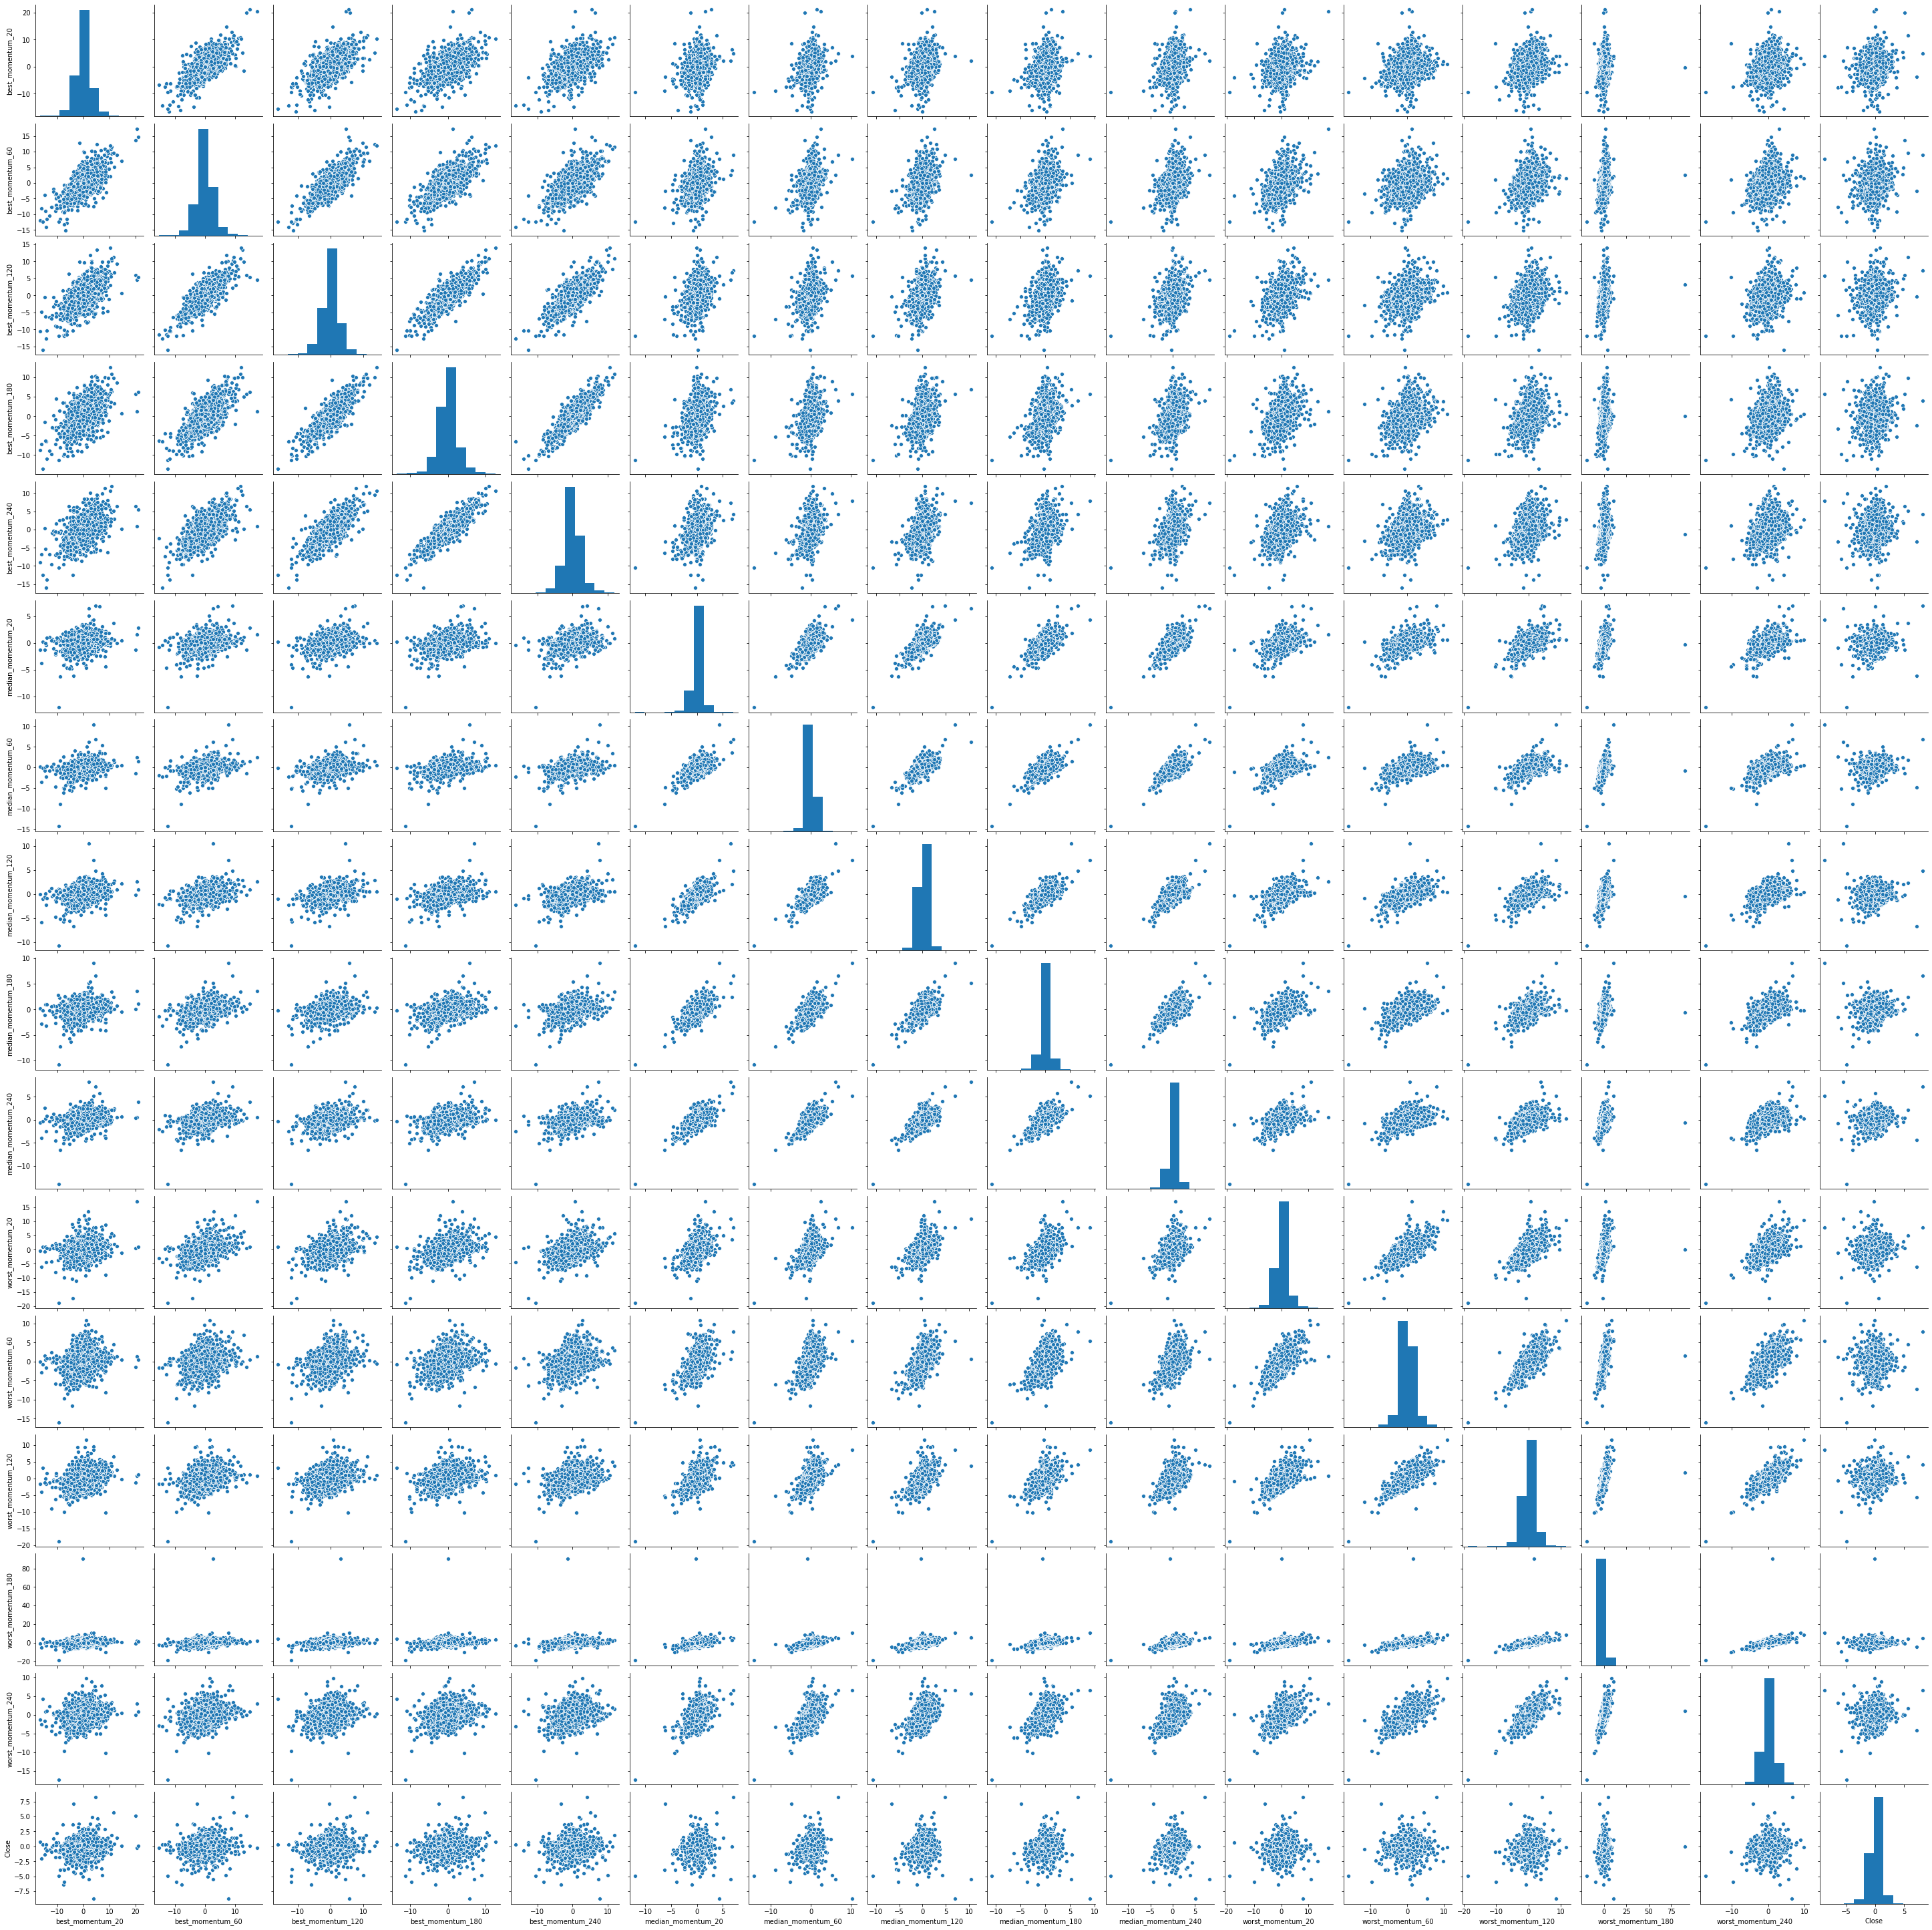

In [123]:
sb.pairplot(eqt3)

best,median,worst로 분류된 동일한 포트폴리오 그룹내에서의 상관관계가 유의미 했고, 

동일한 그룹에서 모멘텀전략의 기간차이가 작을수록 높은 상관관계를 가지는 경향이 있다.

코스피 수익률과는 15개의 포트폴리오에서 높은 상관관계를 찾을수 없었다.

## 6. 포트폴리오 수익률과 KOSPI 지수 수익률의 누적수익률 그래프

In [125]:
bstvsksp = pd.merge(myDf_best, rtn_ksp.loc[:,'Close'], left_index=True, right_index=True, how='inner')
medvsksp = pd.merge(myDf_median, rtn_ksp.loc[:,'Close'], left_index=True, right_index=True, how='inner')
wrstvsksp = pd.merge(myDf_worst, rtn_ksp.loc[:,'Close'], left_index=True, right_index=True, how='inner')

In [126]:
bstvsksp_cr = (1+bstvsksp/100).cumprod()
medvsksp_cr = (1+medvsksp/100).cumprod()
wrstvsksp_cr = (1+wrstvsksp/100).cumprod()

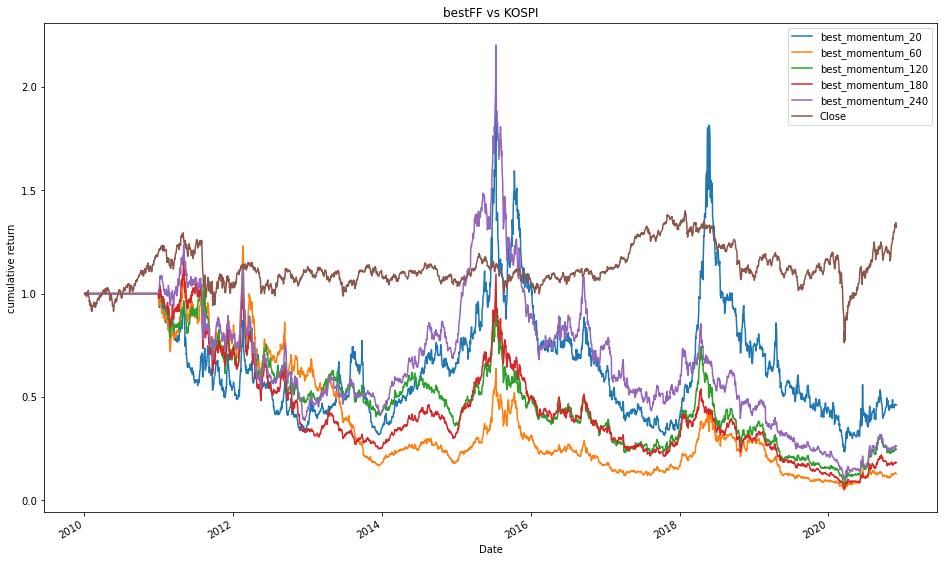

In [133]:
bstvsksp_cr.plot(figsize=(16,10))
plt.title('bestFF vs KOSPI')
plt.ylabel('cumulative return')
plt.legend()

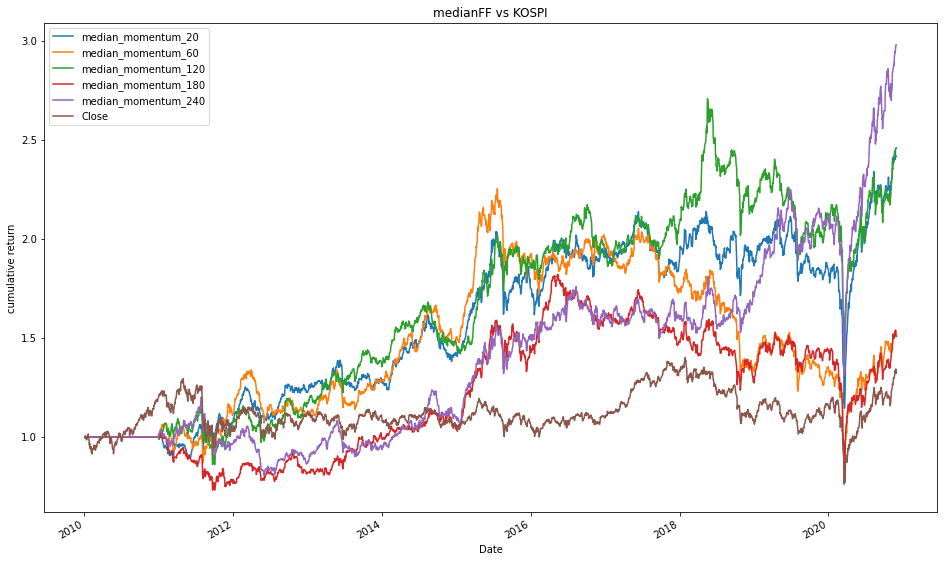

In [134]:
medvsksp_cr.plot(figsize=(16,10))
plt.title('medianFF vs KOSPI')
plt.ylabel('cumulative return')
plt.legend()

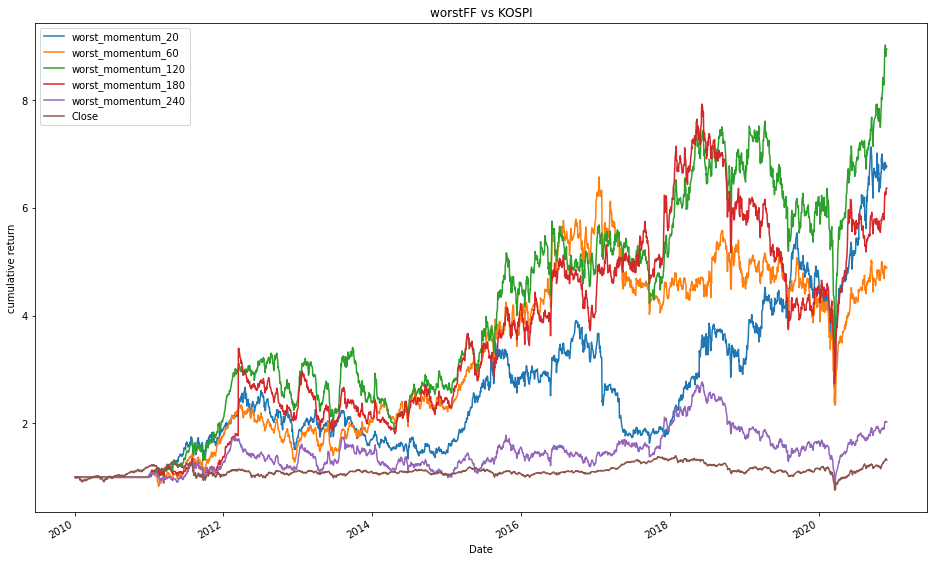

In [135]:
wrstvsksp_cr.plot(figsize=(16,10))
plt.title('worstFF vs KOSPI')
plt.ylabel('cumulative return')
plt.legend()

## 7. 최적의 투자전략과 근거

가장 큰 수익률을 올린 포트폴리오는 worst_momentum의 6개월 모멘텀을 이용한 포트폴리오 구성전략이라는 사실을 그래프를 통해 쉽게 확인할 수 있다. 

이것은 이렇게 해석해 볼 수 있다. 6개월간 주가가 과도하게 떨어진 종목의 경우 높은 확률로 큰폭의 반등을 기대할 수 있었을 것이다.

하지만 그보다 더 긴 9개월과 12개월 모멘텀 전략의 수익률이 저조하다는 점은, 너무 장기간 낮은 수익률을 기록한 종목의 경우 상장폐지를 향하거나 심각한 문제가 있는 기업들이 다수 포함되어 있었을 가능성이 높다는 이유에서인 것으로 추측된다.